<a href="https://colab.research.google.com/github/jimmymanianchira/RandomExperiments/blob/master/Google_Dopamine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow

In [0]:
2+3

5

In [0]:

# @title Install necessary packages.
#dopamine for RL
!pip install --upgrade --no-cache-dir dopamine-rl
# dopamine dependencies
!pip install cmake
#Arcade Learning Environment
!pip install atari_py

    100% |████████████████████████████████| 71kB 2.6MB/s 
    100% |████████████████████████████████| 1.5MB 11.0MB/s 
    100% |████████████████████████████████| 1.0MB 13.5MB/s 
  Running setup.py install for gym ... - \ | / done
    100% |████████████████████████████████| 17.7MB 2.1MB/s 
    100% |████████████████████████████████| 768kB 6.7MB/s 
  Running setup.py bdist_wheel for atari-py ... - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / done
  Stored in di

In [0]:

# @title Necessary imports and globals.# @titl 
#matrix math
import numpy as np
#load files
import os
#DQN for baselines
from dopamine.agents.dqn import dqn_agent
#high level agent-environment excecution engine
from dopamine.atari import run_experiment
#visualization + data downloading
from dopamine.colab import utils as colab_utils
#warnings
from absl import flags

#where to store training logs
BASE_PATH = '/tmp/colab_dope_run'  # @param
#which arcade environment?
GAME = 'Asterix'  # @param

In [0]:

# @title Create a  new agent from scratch.# @titl 

#define where to store log data
LOG_PATH = os.path.join(BASE_PATH, 'basic_agent', GAME)

In [0]:
class BasicAgent(object):
  def __init__(self, sess, num_actions, switch_prob=0.1):
    self.sess=sess
    self._num_actions=num_actions
    self._switch_prob = switch_prob
    self._last_action = np.random.randint(num_actions)

    self.eval_mode = False
    
  def _choose_action(self):
    if np.random.random() <= self._switch_prob:
      self._last_action = np.random.randint(self._num_actions)
    return self._last_action
    
  #when it checkpoints during training, anything we should do?
  def bundle_and_checkpoint(self, unused_checkpoint_dir, unused_iteration):
    pass
    
  #loading from checkpoint
  def unbundle(self, unused_checkpoint_dir, unused_checkpoint_version,
               unused_data):
    pass
  
  #first action to take
  def begin_episode(self, unused_observation):
    return self._choose_action()
  
  #cleanup
  def end_episode(self, unused_reward):
    pass
  def step(self, reward, observation):
    return self._choose_action()
def create_basic_agent(sess, environment):
  """The Runner class will expect a function of this type to create an agent."""
  return BasicAgent(sess, num_actions=environment.action_space.n,
                     switch_prob=0.2)

In [0]:
basic_runner = run_experiment.Runner(LOG_PATH,
                                      create_basic_agent,
                                      game_name=GAME,
                                      num_iterations=200,
                                      training_steps=10,
                                      evaluation_steps=10,
                                      max_steps_per_episode=100)

In [0]:

# @title Train Basic Agent.# @title 
print('Will train basic agent, please be patient, may be a while...')
basic_runner.run_experiment()
print('Done training!')

Will train basic agent, please be patient, may be a while...
INFO:tensorflow:Beginning training...
INFO:tensorflow:Starting iteration 0
INFO:tensorflow:Average undiscounted return per training episode: 0.00
INFO:tensorflow:Average training steps per second: 724.14
INFO:tensorflow:Average undiscounted return per evaluation episode: 50.00
INFO:tensorflow:Starting iteration 1
INFO:tensorflow:Average undiscounted return per training episode: 150.00
INFO:tensorflow:Average training steps per second: 731.37
INFO:tensorflow:Average undiscounted return per evaluation episode: 50.00
INFO:tensorflow:Starting iteration 2
INFO:tensorflow:Average undiscounted return per training episode: 100.00
INFO:tensorflow:Average training steps per second: 727.92
INFO:tensorflow:Average undiscounted return per evaluation episode: 50.00
INFO:tensorflow:Starting iteration 3
INFO:tensorflow:Average undiscounted return per training episode: 50.00
INFO:tensorflow:Average training steps per second: 747.63
INFO:tenso

In [0]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip


Redirecting output to ‘wget-log.1’.
Archive:  ngrok-stable-linux-amd64.zip
replace ngrok? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [0]:
LOG_DIR = LOG_PATH
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)

In [0]:
get_ipython().system_raw('./ngrok http 6006 &')

In [0]:
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

http://dfc428a9.ngrok.io


In [0]:
# @title Load baseline data
!gsutil -q -m cp -R gs://download-dopamine-rl/preprocessed-benchmarks/* /content/
experimental_data = colab_utils.load_baselines('/content')

In [0]:

# @title Load the training logs.# @titl 
basic_data = colab_utils.read_experiment(log_path=LOG_PATH, verbose=True)
basic_data['agent'] = 'BasicAgent'
basic_data['run_number'] = 1
experimental_data[GAME] = experimental_data[GAME].merge(basic_data,
                                                        how='outer')

Reading statistics from: /tmp/colab_dope_run/basic_agent/Asterix//logs/log_199


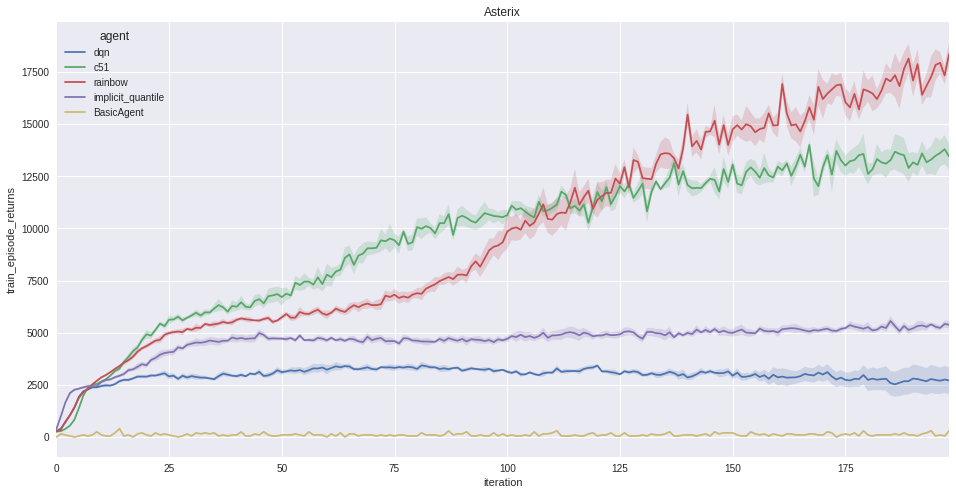

In [0]:
# @title Plot training results.

import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16,8))
sns.tsplot(data=experimental_data[GAME], time='iteration', unit='run_number',
           condition='agent', value='train_episode_returns', ax=ax)
plt.title(GAME)
plt.show()